E-commerce Data Sample:


,UserID,ProductID,Rating,Timestamp,Category
0,U000,P0009,5,2024-09-08,Books
1,U000,P0020,1,2024-09-02,Home
2,U000,P0012,4,2024-10-18,Books
3,U000,P0013,1,2024-09-18,Clothing
4,U000,P0070,4,2024-09-16,Toys
5,U000,P0014,1,2024-09-15,Home
6,U000,P0048,5,2024-09-09,Toys
7,U000,P0079,4,2024-10-18,Electronics
8,U000,P0042,3,2024-09-07,Toys
9,U000,P0050,1,2024-10-14,Clothing



Product Details Sample:


,ProductID,ProductName,Category
0,P0000,Toys Item 0,Clothing
1,P0001,Clothing Item 1,Electronics
2,P0002,Books Item 2,Electronics
3,P0003,Clothing Item 3,Electronics
4,P0004,Clothing Item 4,Electronics
5,P0005,Home Item 5,Toys
6,P0006,Books Item 6,Books
7,P0007,Books Item 7,Books
8,P0008,Books Item 8,Electronics
9,P0009,Clothing Item 9,Books


Checking for missing values...
UserID       0
ProductID    0
Rating       0
Timestamp    0
Category     0
dtype: int64 

ProductID      0
ProductName    0
Category       0
dtype: int64 

Missing values after cleaning:
UserID       0
ProductID    0
Rating       0
Timestamp    0
Category     0
dtype: int64 

ProductID      0
ProductName    0
Category       0
dtype: int64 

Creating user-item matrix...
User-Item Matrix Sample:


ProductID,P0000,P0001,P0002,P0003,P0004,P0005,P0006,P0007,P0008,P0009,...,P0090,P0091,P0092,P0093,P0094,P0095,P0096,P0097,P0098,P0099
UserID,,,,,,,,,,,,,,,,,,,,,
U000,0.0,0.0,0.0,3.0,0.0,5.0,0.0,3.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U001,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
U002,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
U004,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0
U005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
U006,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U007,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
U008,0.0,0.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0


Computing user similarity...
Generating similarity heatmap...


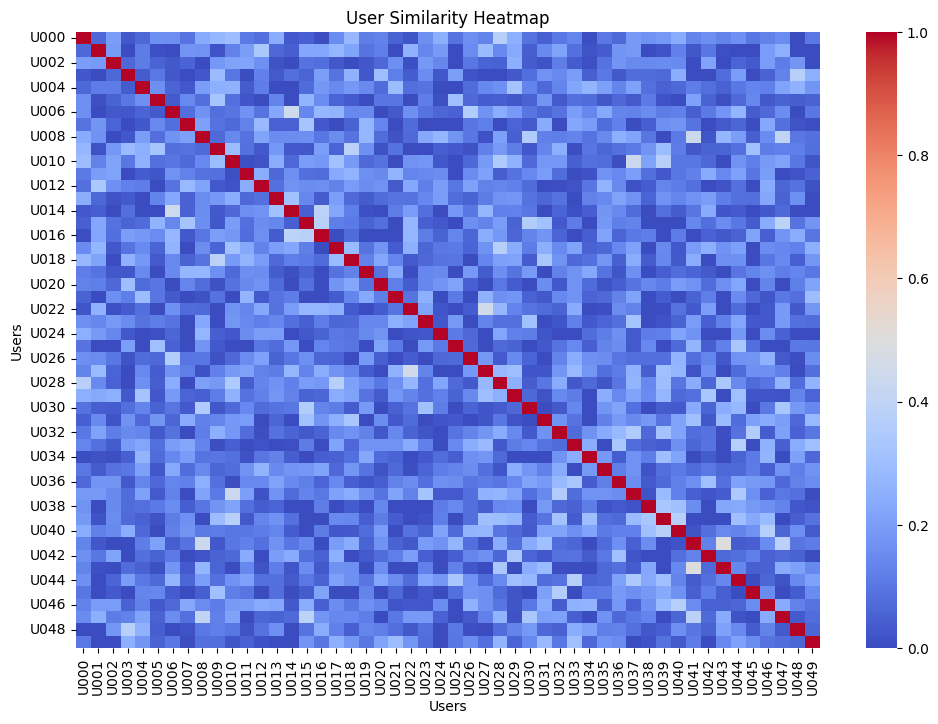

Fetching top-5 recommendations for User U000...
Recommended Products:


,ProductID,ProductName,Category
29,P0029,Books Item 29,Electronics
51,P0051,Home Item 51,Clothing
58,P0058,Toys Item 58,Beauty
64,P0064,Electronics Item 64,Electronics
70,P0070,Beauty Item 70,Toys


In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
ecommerce_data = pd.read_csv("ecommerce_user_data.csv")
product_details = pd.read_csv("product_details.csv")

# Display first few rows of each dataset
print("E-commerce Data Sample:")
display(ecommerce_data.head(10))
print("\nProduct Details Sample:")
display(product_details.head(10))

# Data Cleaning & Preprocessing
print("Checking for missing values...")
print(ecommerce_data.isnull().sum(), "\n")
print(product_details.isnull().sum(), "\n")

ecommerce_data.dropna(inplace=True)
product_details.dropna(inplace=True)

print("Missing values after cleaning:")
print(ecommerce_data.isnull().sum(), "\n")
print(product_details.isnull().sum(), "\n")

# Convert user-item interactions into a user-item matrix
print("Creating user-item matrix...")
user_item_matrix = ecommerce_data.pivot_table(index='UserID', columns='ProductID', values='Rating', fill_value=0)
print("User-Item Matrix Sample:")
display(user_item_matrix.head(10))

# Compute Cosine Similarity between users
print("Computing user similarity...")
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Visualizing User Similarity Matrix
print("Generating similarity heatmap...")
plt.figure(figsize=(12, 8))
sns.heatmap(user_similarity_df, cmap='coolwarm', annot=False, cbar=True)
plt.xlabel("Users")
plt.ylabel("Users")
plt.title("User Similarity Heatmap")
plt.show()

# Recommend top-N products for a given user
def get_recommendations(user_id, top_n=5):
    print(f"Fetching top-{top_n} recommendations for User {user_id}...")

    similar_users = user_similarity_df[user_id].sort_values(ascending=False).iloc[1:]
    top_similar_user = similar_users.idxmax()

    top_products = user_item_matrix.loc[top_similar_user].sort_values(ascending=False).index[:top_n]
    recommendations = product_details[product_details['ProductID'].isin(top_products)]

    print("Recommended Products:")
    display(recommendations)
    return recommendations

# Example usage
example_user = user_item_matrix.index[0]
recommendations = get_recommendations(example_user)